[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/main?filepath=notebooks%2FAula_19_Redes_Neurais_Convolucionais_com_PyTorch.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_19_Redes_Neurais_Convolucionais_com_PyTorch.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Redes Neurais Convolucionais com PyTorch

**Objetivos**: Aprender Redes Neurais Convolucionais (_Convolution Neural Networks_ - CNN) usando a biblioteca `PyTorch`.

> Observação: Algumas imagens foram adaptadas de [Adventures in Machine Learning](https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/) (Licença CC-BY-SA).

## PyTorch

[**PyTorch**](https://www.pytorch.org/) é uma biblioteca de código aberto para aprendizado de máquina aplicável a uma ampla variedade de tarefas. Foi criada pelo **Facebook** em 2016 e é a principal biblioteca para criação e treinamento de redes neurais artificiais. A API toda é escrita em Python mas é executada em C++ na CPU ou em CUDA/ROCM na GPU.

No momento que eu escrevo esse tutorial (Abril de 2021), PyTorch está superando o TensorFlow (Google) em desempenho e adoção de uso. Isso acontece tanto na [academia](http://horace.io/pytorch-vs-tensorflow/) (mensurado pela adoção de artigos científicos nos principais encontros científicos de Aprendizagem Profunda e Aprendizagem de Máquina) quanto na [indústria](https://www.infoworld.com/article/3597904/why-enterprises-are-turning-from-tensorflow-to-pytorch.html) (mensurado pela adoção de grandes e renomadas empresas de tecnologia).

### Atualização (Junho 2022):

TensorFlow está morto, Vida Longa ao PyTorch: [Google lost the battle for machine learning to Meta, insiders say. Now it's betting the future of its own products on a new internal AI project.](https://www.businessinsider.com/facebook-pytorch-beat-google-tensorflow-jax-meta-ai-2022-6).

> Now, under the shadow of PyTorch, Google has been quietly building out a machine learning framework, called JAX (at one point an acronym for "Just After eXecution," but officially no longer stands for anything), that many see as the successor to TensorFlow.

Meus comentários: JAX é mais um backend de _autodiff_ do que uma biblioteca de redes neurais.
Ou seja tem um uso muito mais amplo que PyTorch.
Por exemplo, como um amostrador Monte Carlo de correntes ou cadeias Markov (_Markov Chain Monte Carlo_ - MCMC).

## Imagens e Filtros

Todo dado estruturado e não-esturutado é representado como matrizes no computador.
Veja o caso de imagens.
Elas são literalmente matrizes multidimensionais.

* Uma imagem colorida é uma Array de dimensão $X \times Y \times 3$:
    * $X$ = quantidade de pixels no eixo horizontal
    * $Y$ = quantidade de pixels no eixo vertical
    * $3$ = são 3 canais de cores - **R**ed, **G**reen e **B**lue

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/images_as_matrix.png?raw=1" alt="Row vs Cols" style="width: 500px;"/>

#### Convoluções

Em matemática **[convolução](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o) é um operador linear** que, a partir de **duas funções dadas**, **resulta numa terceira que mede a soma do produto dessas funções ao longo da região** subentendida pela superposição delas em função do deslocamento existente entre elas.

A notação para a convolução de $f$ e $g$ é $f*g$. Ela é definida como a integral do produto de uma das funções por uma cópia deslocada e invertida da outra; a função resultante $h$ depende do valor do deslocamento. Se $x$ for a variável independente e $u$, o deslocamento, a fórmula pode ser escrita como:

$$(f * g) (x) = h(x) = \int_{-\infty}^{\infty} f(u) \cdot g(x-u) du$$

Existe ainda uma definição de **convolução para funções de domínio discreto**, dada por

$$(f * g) (k) = h(k)= \sum_{j=0}^{k} f(j) \cdot g(k-j)$$

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/convolution.gif?raw=1" alt="Row vs Cols" style="width: 400px;"/>

Inclusive, convoluções, onde a "máquina" aprende os filtros (os números que vão dentro da matriz), é a base das redes neurais que detectam objetos!

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/deeplearning_convolutions.gif?raw=1" alt="Deep Learning Convolutions" style="width: 600px;"/>

## O que é uma Rede Neural Artificial?

Redes neurais artificiais (RNAs) são modelos computacionais inspirados pelo sistema nervoso central (em particular o cérebro) que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. Redes neurais artificiais geralmente são apresentadas como sistemas de "neurônios interconectados, que podem computar valores de entradas", simulando o comportamento de redes neurais biológicas.

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/redes_neurais.jpeg?raw=1" alt="redes neurais" style="width: 500px;"/>

## Como a rede neural aprende?

Em cada neurônio há uma função de ativação (*activation function*) que processa uma combinação linear entre _inputs_ e pesos sinápticos, gerando assim um sinal de saída.

A informação flui da *input layer* para as *hidden layers* e por fim para a *output layer*. Nesse fluxo os inputs de dados da *input layer* são alimentados para os neurônios das *hidden layers* que por fim alimentam o neurônio final da *output layer*.

A primeira passada de informação (propagação) pela rede é geralmente feita com parâmetros aleatórios para as funções de ativação dos neurônios.

Ao realizar a propagação, chamada de *feed forward*, temos sinais de saídas nos neurônios da output layer.

No fim da propagação, a função custo (uma métrica de erro) é calculada e o modelo então ajusta os parâmetros dos neurônios na direção de um menor custo (por meio do gradiente - derivada multivariada).

Assim uma nova propagação é gerada e a numa nova função custo e calculada. Assim como é realizado a atualização dos parâmetros dos neurônios.

O nome desse algoritmo é **Retro-propagação** (*Backpropagation*). E cada vez que ele é executado denomina-se como época (*epoch*). E quandos as épocas estabelecidas se encerram, a rede neural encerra o seu treinamento/aprendizagem.

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/backpropagation.gif?raw=1" alt="backpropagation" style="width: 500px;"/>

#### Por que Redes Neurais Convolucionais?
As Redes Neurais Convolucionais têm a capacidade de **extrair automaticamente características dos padrões a serem aprendidos** (por meio das camadas de convolução), tarefa que necessariamente tem que ser implementada separadamente quando se emprega uma Rede Neural padrão ("vanilla", _**M**ulti**l**ayer **P**erceptron_ - MLP) ou um outro classificador convencional (por exemplo, _**S**upport **V**ector **M**achine_ - SVM)


#### O que muda numa Rede Neural Convolucional?

**Nada**.

Apenas que a rede neural possui um maior número de parâmetros pois precisa aprender todos os parâmetros dos filtros e convoluções que ocorrem em algumas de suas camadas internas.

### Camadas Necessárias para Convolução

As redes neurais convolucionais se distinguem de outras redes neurais por seu desempenho superior com dados de imagem, voz ou áudio. Elas têm três tipos principais de camadas, que são:

* Camada Convolucional
* Camada de _Pooling_
* Camada de Neurônios Totalmente Conectados (também chamado de _Fully Connected_ ou _Dense_)


#### Camadas de Convolução (_Convolution Layers_)

Isto é uma camada para uma "janela" ou "filtro" deslizante que passamos pela imagem.
Essa "janela" aplica um certo peso aos neurônios (pixels) adjacentes de uma certa vizinhança de pixels.

Filtro $2 \times 2$ com todos os pesos igual a $0.5$:

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/moving-filter.webp?raw=1" alt="filtro convolução 2x2" style="width: 500px;"/>

$$\begin{align}
 out_1 &= 0.5 in_1 + 0.5 in_2 + 0.5 in_6 + 0.5 in_7 \\
 &= 0.5 \times 2.0 + 0.5 \times 3.0 + 0.5 \times 2.0 + 0.5 \times 1.5  \\
 &= 4.25 \\
 out_2 &= 0.5 in_2 + 0.5 in_3 + 0.5 in_7 + 0.5 in_8 \\
 &= 0.5 \times 3.0 + 0.5 \times 0.0 + 0.5 \times 1.5 + 0.5 \times 0.5  \\
 &= 2.5 \\
 \end{align}$$

Na rede neural este filtro funciona assim quando compararmos com relação a camada anterior (_inputs_):

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/moving-filter-node-diagram.webp?raw=1" alt="filtro convolução 2x2" style="width: 300px;"/>

#### Camadas de _Pooling_

Uma outra técnica de "janela" ou "filtro" deslizante, mas ao invés de aplicar pesos, aplica uma função estatística sobre os conteúdos da sua "janela".

A função estatística mais comum é o máximo `max()`.
Essa é chamada de _max pooling_.

##### Duas vantagens:

- Reduz o número de parâmetros do modelo por um processo chamado _down-sampling_
- Faz com que a detecção de atributos seja mais robusta à mudanças na orientação do objeto e mudanças de escalas

_Max pooling_ com _padding_:

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/max-pooling.webp?raw=1" alt="Max Pooling" style="width: 500px;"/>

#### Juntanto todas as camadas

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/typical_cnn.webp?raw=1" alt="Rede Neural Convolucional Típica" style="width: 500px;"/>

### Estruturação dos módulos de PyTorch

```python
import torch
```
* [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) - Tensores (arrays N-D)
* [`torch.nn`](https://pytorch.org/docs/stable/nn.html) - Redes Neurais (_**N**eural **N**etworks_)
* [`torch.optim`](https://pytorch.org/docs/stable/optim.html) - Otimização (_**Optim**ization_)
* [`torch.data`](https://pytorch.org/docs/stable/data.html) - *Datasets* e Ferramentas de Streaming de Dados
* [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) - Diferenciação Automática (_**Auto**matic Differentiation_)
* [`torch.vision`](https://pytorch.org/docs/stable/torchvision/index.html) - Ferramentas de Manipulação de Imagens e Visão Computacional
* [`torch.audio`](https://pytorch.org/audio/stable/index.html) - Ferramentas de Manipulação de Áudio
* [`torch.jit`](https://pytorch.org/docs/stable/jit.html) - Compilação _**j**ust-**i**n-**t**ime_ de modelos PyTorch em binários


### `torch.Tensor`

* `NumPy` - `np.ndarray`
* `pandas` - `pd.Series` e `pd.DataFrame`
* `PyTorch` - `torch.Tensor`

## Exemplo com o [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

O dataset **MNIST** (_**M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology_) é um clássico de Deep Learning. São imagens preto e branco de dígitos de 0 a 9 de formato 28x28 pixels (784 pixels)

Contém 60.000 imagens de treino e 10.000 de teste e é um padrão de benchmark de modelos (acho que "foi", não é tão usado assim mais)


<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/MNIST.png?raw=1" alt="MNIST" style="width: 500px;"/>

O pacote `torchvision` do `PyTorch` tem integrado já o dataset MNIST:

In [56]:
import torchvision
from torchvision import transforms
import torch

# MNIST dataset
root_path = '/content/drive/MyDrive/Colab Notebooks/Downloads' # mude isso no Colab se necessário

#Estratéfia antiga antes do ex#
# trans_train = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,)),
#     transforms.RandomRotation(degrees=15) # Adicionando rotação aleatória
# ])

#Ex:3
# Nova estratégia de transformações com mais aumento de dados
trans_aumentado = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    # Translação horizontal e vertical aleatória de até 10%
    # Zoom aleatório entre 90% e 110%
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    # Alteração de perspectiva
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5) # p=0.5 aplica a transformação em 50% das imagens
])


# Transformações para os datasets de teste e validação (apenas formatação)
trans_test_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


# Train/Test Datasets
# Aplicando a nova transformação de aumento de dados no dataset de treino completo. EX3 Troca do transform=
full_train_dataset = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans_aumentado, download=True)
# Aplicando a transformação de teste/validação no dataset de teste
test_dataset = torchvision.datasets.MNIST(root=root_path, train=False, transform=trans_test_val)

print("Nova estratégia de aumento de dados aplicada ao conjunto de treino.")

Nova estratégia de aumento de dados aplicada ao conjunto de treino.


In [57]:
full_train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/Downloads
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
               RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1), scale=(0.9, 1.1))
               RandomPerspective(p=0.5)
           )

### 2. Divisão em Treino e Validação

Usamos `random_split` para dividir o `full_train_dataset` em um conjunto de treino e um de validação. Uma divisão comum é 80% para treino e 20% para validação.

In [58]:
from torch.utils.data import random_split
# Definir os tamanhos para treino e validação
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

# Dividir o dataset
train_dataset, val_dataset = random_split(
    full_train_dataset, [train_size, val_size])

print(f"Tamanho do dataset de treino: {len(train_dataset)}")
print(f"Tamanho do dataset de validação: {len(val_dataset)}")
print(f"Tamanho do dataset de teste: {len(test_dataset)}")

Tamanho do dataset de treino: 48000
Tamanho do dataset de validação: 12000
Tamanho do dataset de teste: 10000


Para controlar como que os dados são inseridos no modelo e, logo, o Batch Size é preciso implementar um [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Argumentos do `DataLoader()`:

* **`dataset`**: um `Dataset` PyTorch
    * tem [vários tipos](https://pytorch.org/docs/stable/data.html)
    * no nosso exemplo vou usar um simples [`TensorDataset`](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#TensorDataset) que é um wrapper de `np.ndarray` e `pd.Series` para `torch.Tensor`)
* **batch_size**: `int` - tamanho do Batch Size, padrão é 1
* **shuffle**: `bool` - se vai embaralhar os dados antes de enviar em batches ao modelo, padrão é `False`. Recomendo usar `shuffle=True`

In [60]:
from torch.utils.data import DataLoader

batch_size=32

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

#### [Camadas de Convolução (_Convolution Layers_)](https://pytorch.org/docs/stable/nn.html#convolution-layers)

* [`nn.Conv1d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv3d): convolução 1-D.
* [`nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): convolução 2-D.
* [`nn.Conv3d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv3d.html): convolução 3-D.

#### [Camadas de _Pooling_](https://pytorch.org/docs/stable/nn.html#pooling-layers)

* [`nn.MaxPool1d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.htm): 1-D _max pooling_.
* [`nn.MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.htm): 2-D _max pooling_.
* [`nn.MaxPool3d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool3d.htm): 3-D _max pooling_.

### Qual a rede neural convolucional que vamos criar para o MNIST?

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/MNIST-CNN.webp?raw=1" alt="MNIST CNN" style="width: 700px;"/>

## Como construir sua rede neural convolucional no PyTorch

Construir redes neurais com o **PyTorch** é fácil.

Temos que criar uma Rede Neural a partir de uma classe [`nn.Module()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=module#torch.nn.Module) e criar um construtor com o método `__init__()` e implementar todas as layers e propagações desejadas com o método `forward()`.

In [61]:
import torch.nn as nn

In [62]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Sequential(
            nn.Linear(7 * 7 * 64, 1000),
            nn.ReLU())
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

# Instancia o Model()
model = ConvNet()

print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=3136, out_features=1000, bias=True)
    (1): ReLU()
  )
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)


Quantos paramêtros temos?

In [63]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

3199106

## Como treinar sua rede neural no PyTorch

Uma vez especificado e instanciado o modelo, podemos manipulá-lo de maneira dinâmica.
Escolhemos a função custo (`loss_fn`) como `nn.CrossEntropyLoss()` e também a taxa de aprendizagem $\eta$ em `1e-6` e a quantidade de épocas a serem treinadas (`epochs`):

```python
model = Sua_rede_neural()
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-6
epochs = 100

# Instânciar o Otimizador Adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For-loop de treino
for epoch in range(epochs): # para cada época
    for (images, labels) in train_loader: # para cada batch
        # Gera a propagação (feed forward)
        outputs = model(images)
        
        # Calcula a função-custo
        loss = loss_fn(outputs, labels)
        
        # Retro-propagação (Backprop) e a otimização com Adam
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

In [64]:
from torch.optim import Adam

# Hiperparâmetros
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
epochs = 6

# Instânciar o Otimizador Adam
optimizer = Adam(model.parameters(), lr=learning_rate)

### OBSERVAÇÃO

Esta rede neural possui muitos parâmetros.
Aproximadamente 3 milhões e 200 mil paramêtros!
Não tente rodar isso sem ser usando uma GPU!
O Google Colab te dá uma GPU de graça.
Clique no botão abaixo para abrir este notebook no Google Colab.
Não esqueça de trocar sua `Runtime` de `None` para `GPU`.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_19_Redes_Neurais_Convolucionais_com_PyTorch.ipynb)

In [65]:
# Isto tem que retornar True
import torch
torch.cuda.is_available()

True

In [66]:
# Sua GPU
torch.cuda.get_device_name()

'Tesla T4'

### Enviar Modelo para GPU (se disponível) EX:1

In [67]:
from torch import device


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando o dispositivo: {device}')


Usando o dispositivo: cuda


In [68]:
# Quantos batches existem no train_loader
total_step = len(train_loader)

# Listas vazias para guardar métricas de treino e validação
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_val_acc = 0  # variável auxiliar (se precisar salvar melhor modelo)

# Mover o modelo para GPU (ex: "cuda:0") ou CPU, dependendo de `device`
model.to(device)


for epoch in range(epochs): # para cada época
    # ------------------- Treino -------------------
    model.train()  # modo de treino (ativa dropout, batchnorm, etc.)
    train_loss = 0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Mover os dados para GPU/CPU
        images, labels = images.to(device), labels.to(device)

        # Forward pass (propagação)
        outputs = model(images)

        # Calcula a função custo
        loss = loss_fn(outputs, labels)

        # Backprop + atualização dos pesos
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Acumula loss e acurácia no treino
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print a cada 100 batches
        if (i + 1) % 100 == 0:
            print(f"Época [{epoch+1}/{epochs}], Step [{i+1}/{total_step}], "
                  f"Custo: {loss.item():.3f}, "
                  f"Acurácia: {(correct/total)*100:.2f}%")

    # Média de perda e acurácia de treino por época
    train_loss /= len(train_loader.dataset)
    train_acc = 100 * correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    # ------------------- Validação -------------------
    model.eval()  # modo de avaliação (desativa dropout, batchnorm fixo)
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # não acumula gradientes na validação
        for images, labels in val_loader:
            # Mover os dados para GPU/CPU
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calcula função custo
            loss = loss_fn(outputs, labels)

            # Acumula loss e acurácia
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Média de perda e acurácia de validação por época
    val_loss /= len(val_loader.dataset)
    val_acc = 100 * correct / total
    valid_loss_list.append(val_loss)
    valid_acc_list.append(val_acc)

    # Print resumo da época
    print(f"Validação - Época [{epoch+1}/{epochs}], "
          f"Custo: {val_loss:.3f}, Acurácia: {val_acc:.2f}%")

Época [1/6], Step [100/1500], Custo: 0.531, Acurácia: 70.75%
Época [1/6], Step [200/1500], Custo: 0.243, Acurácia: 80.89%
Época [1/6], Step [300/1500], Custo: 0.178, Acurácia: 84.98%
Época [1/6], Step [400/1500], Custo: 0.242, Acurácia: 87.33%
Época [1/6], Step [500/1500], Custo: 0.265, Acurácia: 88.91%
Época [1/6], Step [600/1500], Custo: 0.157, Acurácia: 90.02%
Época [1/6], Step [700/1500], Custo: 0.019, Acurácia: 90.92%
Época [1/6], Step [800/1500], Custo: 0.039, Acurácia: 91.53%
Época [1/6], Step [900/1500], Custo: 0.171, Acurácia: 92.08%
Época [1/6], Step [1000/1500], Custo: 0.195, Acurácia: 92.51%
Época [1/6], Step [1100/1500], Custo: 0.083, Acurácia: 92.92%
Época [1/6], Step [1200/1500], Custo: 0.031, Acurácia: 93.22%
Época [1/6], Step [1300/1500], Custo: 0.046, Acurácia: 93.45%
Época [1/6], Step [1400/1500], Custo: 0.054, Acurácia: 93.73%
Época [1/6], Step [1500/1500], Custo: 0.004, Acurácia: 93.91%
Validação - Época [1/6], Custo: 0.097, Acurácia: 97.00%
Época [2/6], Step [100/

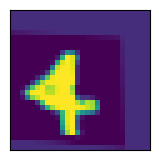

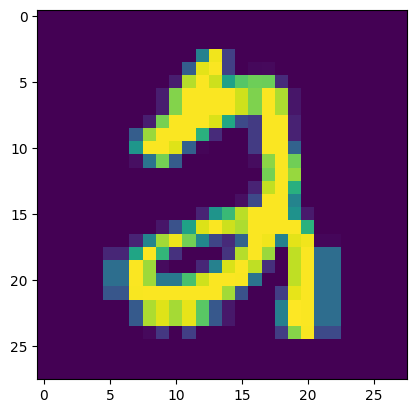

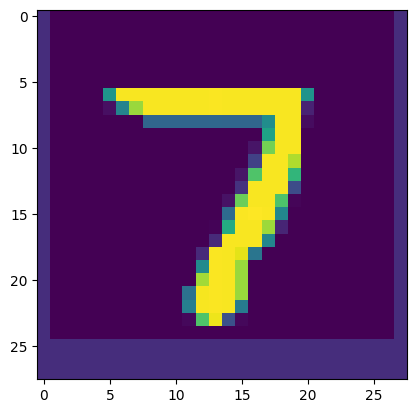

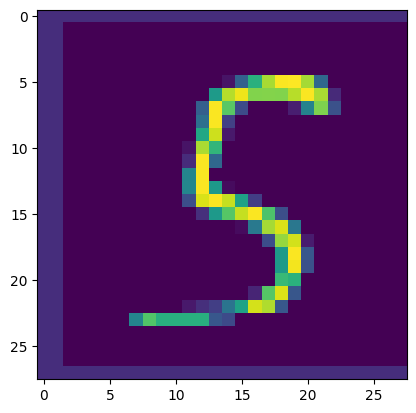

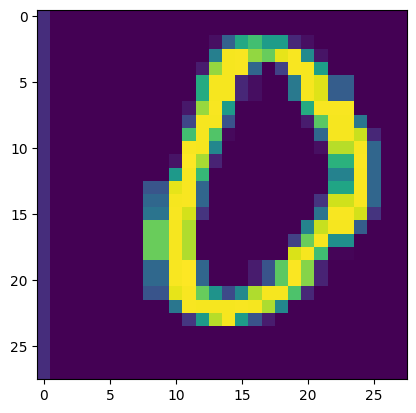

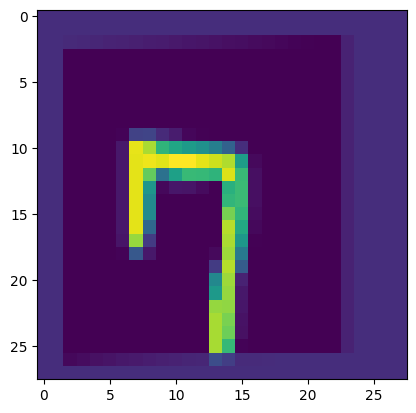

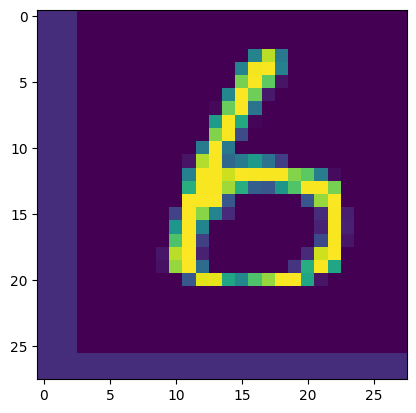

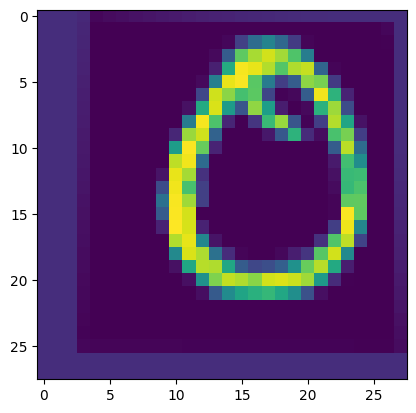

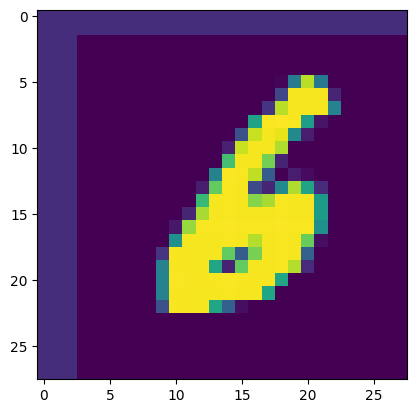

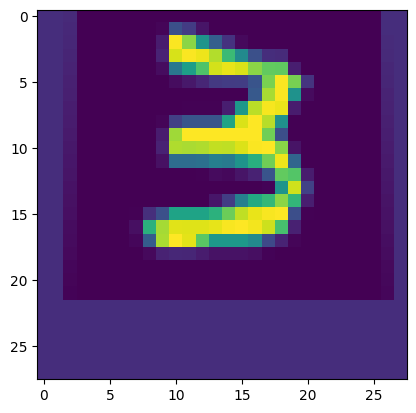

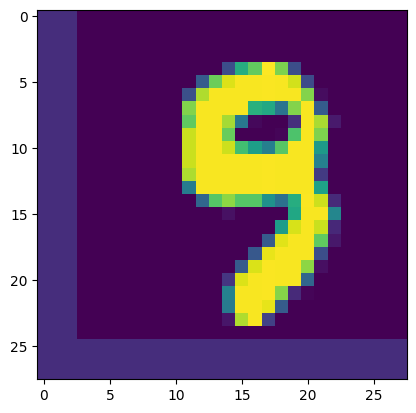

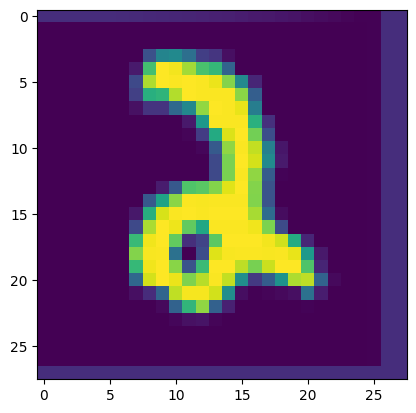

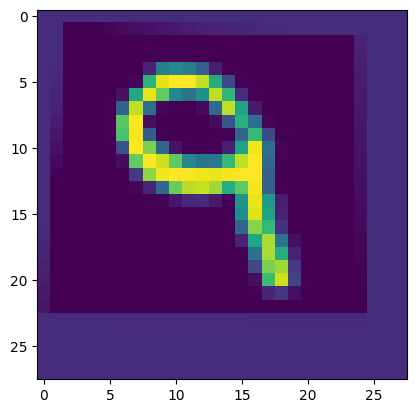

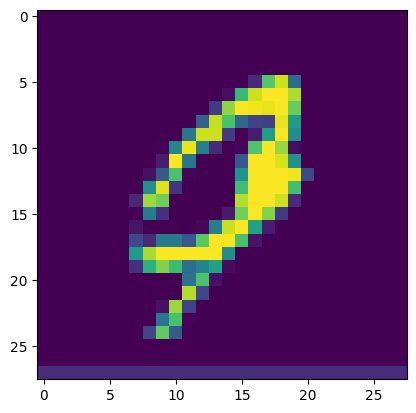

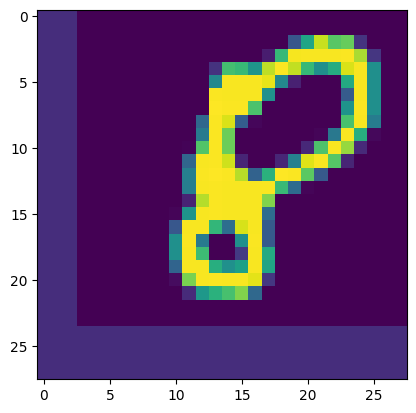

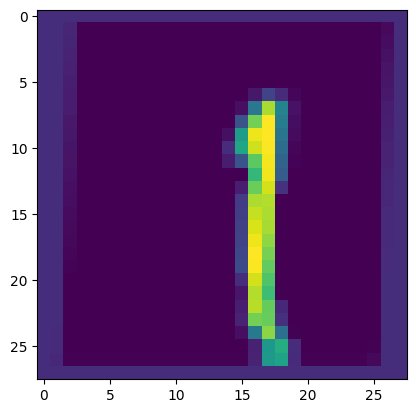

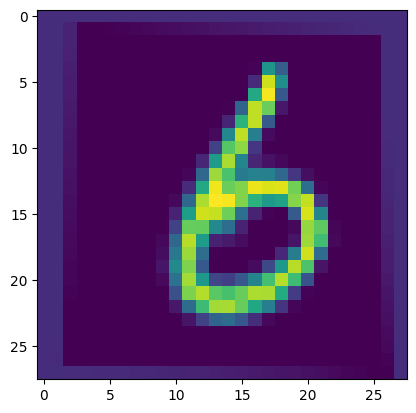

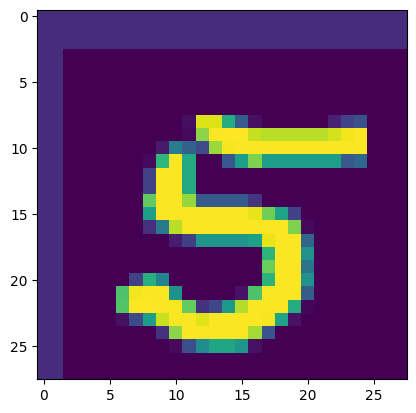

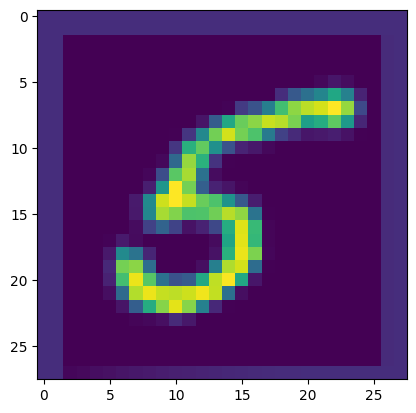

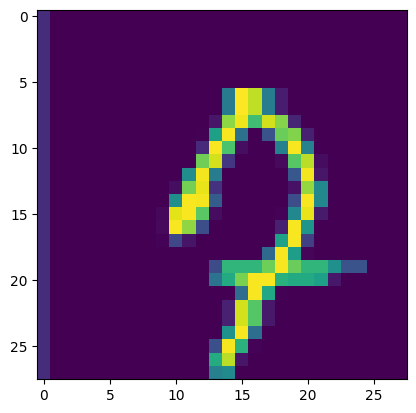

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Função para exibir uma imagem de tensor
def imshow(img):
    # Un-normalize (reverte a normalização para exibir a imagem corretamente)
    # mean = 0.1307, std = 0.3081 do MNIST
    img = img * 0.3081 + 0.1307
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Pegar um batch de imagens e labels do train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Exibir algumas imagens do batch
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(str(labels[idx].item()))

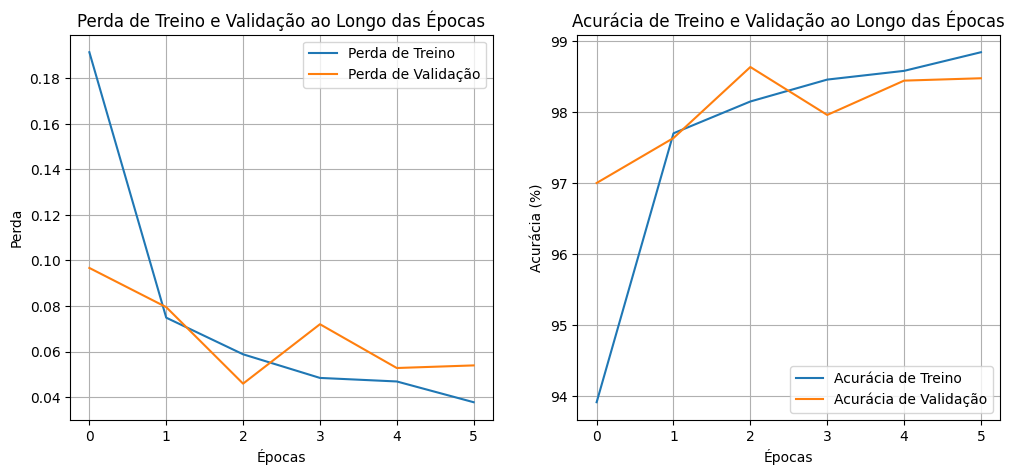

In [70]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

# O modelo está generalizando muito bem após as modificações do ex3 com data augumentation:
    # Translação horizontal e vertical aleatória de até 10%
    # Zoom aleatório entre 90% e 110%
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    # Alteração de perspectiva
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5) # p=0.5 aplica a transformação em 50% das imagens
Não parece haver overfitting

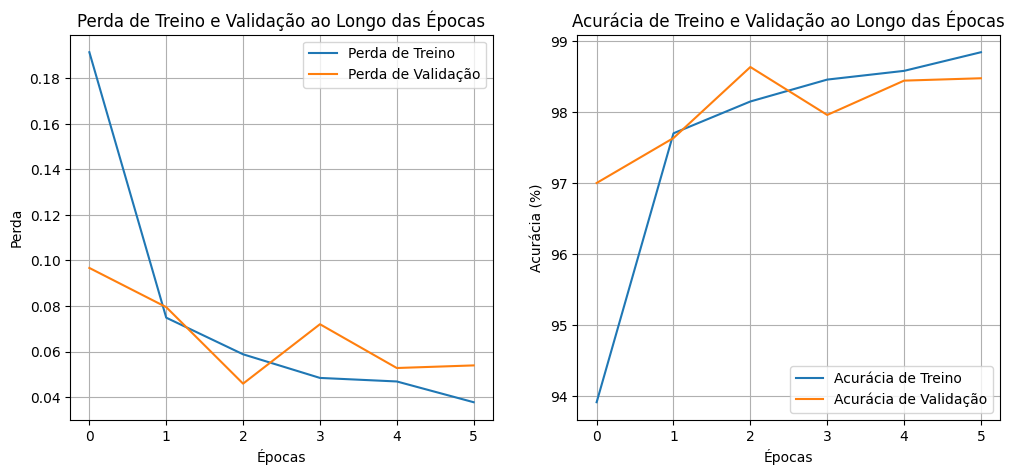

In [71]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

# Epoch =6, learningRate= 0.0001 otimizer=adam Alguns números rotacionados com um ângulo de até 15 graus e embaralhados

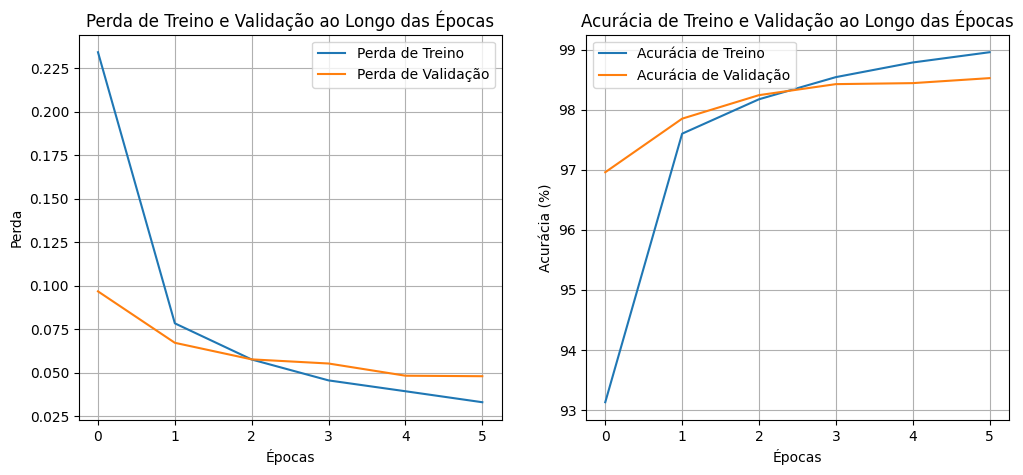

In [ ]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

LearninRate = 0.0001 Otimizador = Adam epoch =10 #  Alguns números rotacionados com um ângulo de até 15 graus e embaralhados

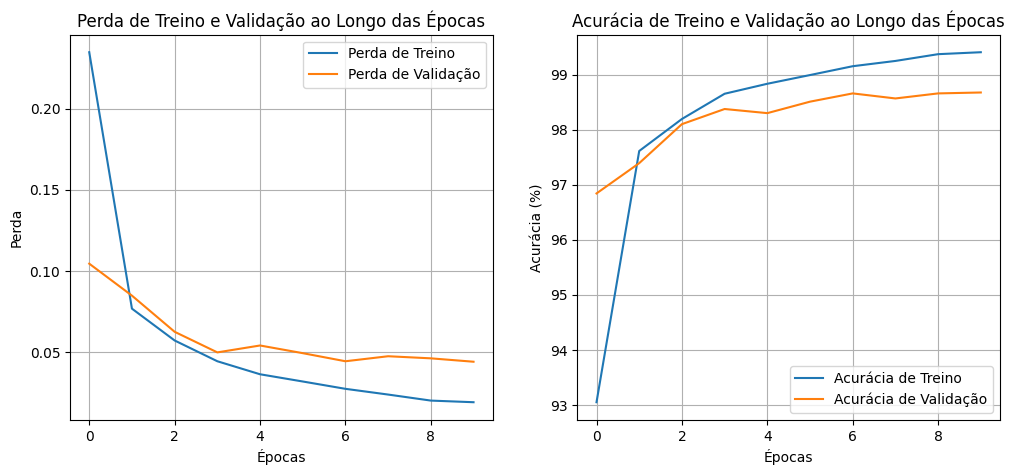

In [ ]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

# Resultados antigos antes do augumentatio para referência


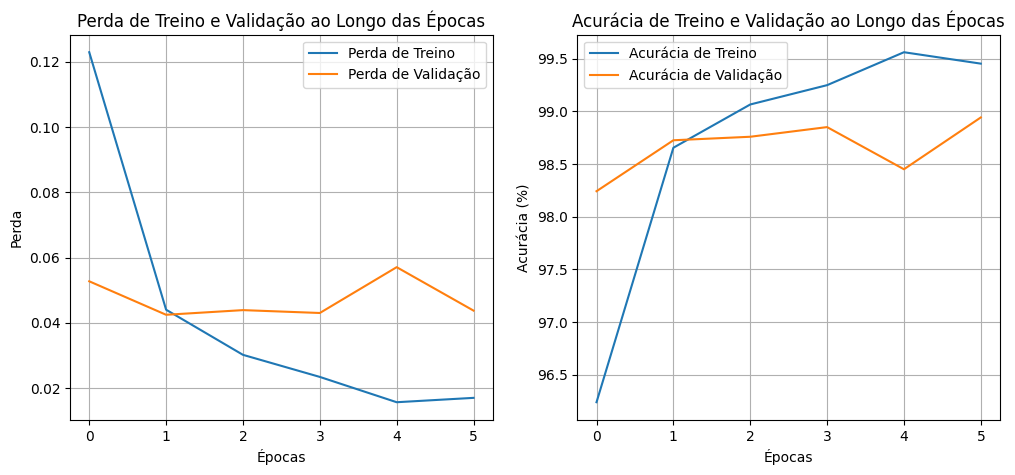

In [ ]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

In [77]:
if val_acc > best_val_acc:
        best_val_acc = val_acc
        checkpoint = {
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'epoch': epoch,
            'train_loss_list': train_loss_list,
            'train_acc_list': train_acc_list,
            'valid_loss_list': valid_loss_list,
            'valid_acc_list': valid_acc_list
        }
        torch.save(checkpoint, 'best_model.pth')
        print(f"✔ Modelo salvo com acurácia de validação: {val_acc:.2f}%")

In [ ]:
# Instancia o modelo novamente
model = ConvNet()

# Carrega o checkpoint salvo
checkpoint = torch.load('best_model.pth')

# Restaura os pesos do modelo
model.load_state_dict(checkpoint['model_state_dict'])

# Mover o modelo para GPU (ex: "cuda:0") ou CPU, dependendo de `device`
model.to(device)

# Instancia o otimizador novamente APÓS mover o modelo para o dispositivo
optimizer = Adam(model.parameters(), lr=learning_rate)

# Recupera a época e métricas
start_epoch = checkpoint['epoch'] + 1
train_loss_list = checkpoint['train_loss_list']
train_acc_list = checkpoint['train_acc_list']
valid_loss_list = checkpoint['valid_loss_list']
valid_acc_list = checkpoint['valid_acc_list']
best_val_acc = max(valid_acc_list)   # ou checkpoint salvo


print(f"Modelo carregado da época {checkpoint['epoch']+1} "
      f"com acurácia de validação de {best_val_acc:.2f}%")

Modelo carregado da época 6 com acurácia de validação de 98.94%


## Se quiser continuar o treino apartir do melhor modelo


In [ ]:
total_epochs =10

for epoch in range(start_epoch, total_epochs): # Se quiser treinar a partir de um modelo ja salvo/carregado
    # ------------------- Treino -------------------
    model.train()  # modo de treino (ativa dropout, batchnorm, etc.)
    train_loss = 0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Mover os dados para GPU/CPU
        images, labels = images.to(device), labels.to(device)

        # Forward pass (propagação)
        outputs = model(images)

        # Calcula a função custo
        loss = loss_fn(outputs, labels)

        # Backprop + atualização dos pesos
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Acumula loss e acurácia no treino
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print a cada 100 batches
        if (i + 1) % 100 == 0:
            print(f"Época [{epoch+1}/{total_epochs}], Step [{i+1}/{total_step}], "
                  f"Custo: {loss.item():.3f}, "
                  f"Acurácia: {(correct/total)*100:.2f}%")


    # Média de perda e acurácia de treino por época
    train_loss /= len(train_loader.dataset)
    train_acc = 100 * correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    # ------------------- Validação -------------------
    model.eval()  # modo de avaliação (desativa dropout, batchnorm fixo)
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # não acumula gradientes na validação
        for images, labels in val_loader:
            # Mover os dados para GPU/CPU
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calcula função custo
            loss = loss_fn(outputs, labels)

            # Acumula loss e acurácia
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Média de perda e acurácia de validação por época
    val_loss /= len(val_loader.dataset)
    val_acc = 100 * correct / total
    valid_loss_list.append(val_loss)
    valid_acc_list.append(val_acc)

    # Print resumo da época
    print(f"Validação - Época [{epoch+1}/{total_epochs}], "
          f"Custo: {val_loss:.3f}, Acurácia: {val_acc:.2f}%")

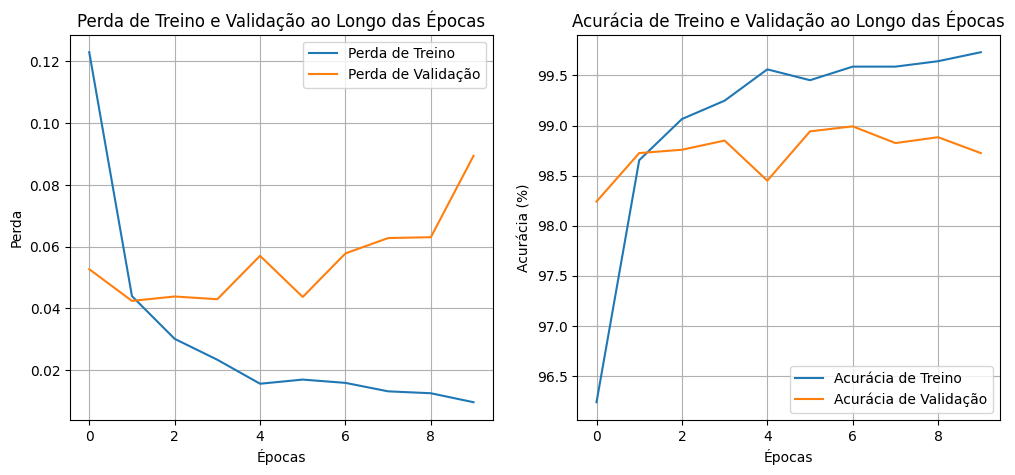

In [ ]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

### Acurácia do Modelo

Usar o comando `model.eval()`

Para a métrica acurácia, retorna um score de acurácia `float` entre $0$ e $1$

In [90]:
model.eval() # coloca o modelo em modo de avaliação (sem calcular gradientes)

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)
        # Feed-forward com as imagens de teste
        outputs = model(images)

        # gera predições usando a função max()
        _, predicted = torch.max(outputs.data, 1)

        # Acumula total e corretas
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Acurácia do Modelo em 10k imagens de teste: {round((correct / total) * 100, 3)}")

Acurácia do Modelo em 10k imagens de teste: 99.03


# Task
Implementar e comparar quatro pipelines de treinamento para um modelo de classificação de imagens, cada um utilizando diferentes estratégias de aumento de dados e mistura: Baseline (sem aumento), Básico (RandomAffine), Avançado (TrivialAugmentWide + RandomErasing) e Mixup/CutMix.

## Definir estratégias de transformação

### Subtask:
Crie diferentes `transforms.Compose` para cada pipeline: Baseline, Básico, Avançado.


**Reasoning**:
The subtask requires creating three different `transforms.Compose` objects for the baseline, basic, and advanced pipelines, in addition to keeping the existing test/validation transformation. This involves using `transforms.ToTensor()`, `transforms.Normalize()`, `transforms.RandomAffine`, `transforms.TrivialAugmentWide()`, and `transforms.RandomErasing`. I will implement these transformations in one code block.



In [78]:
from torchvision import transforms

# 1. Define a transformação trans_baseline
trans_baseline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 2. Define a transformação trans_basico
trans_basico = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.RandomAffine(degrees=15)
])

# 3. Define a transformação trans_avancado
trans_avancado = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.TrivialAugmentWide(),
    transforms.RandomErasing(p=0.02, scale=(0.02, 0.33), ratio=(0.3, 3.3)) # Reduced p for less aggressive erasing
])

# 4. Keep the existing transformation trans_test_val (already defined in previous cell)
# trans_test_val = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
# ])

print("Transformations for Baseline, Basic, and Advanced pipelines created.")

Transformations for Baseline, Basic, and Advanced pipelines created.


## Preparar dataloaders

### Subtask:
Modifique a criação dos DataLoaders para carregar os dados de treino com a transformação desejada para cada pipeline.


**Reasoning**:
Create the full training datasets for each pipeline using their respective transformations and the test dataset, then split the training datasets into training and validation sets, and finally create DataLoaders for all training, validation, and test sets according to the specified batch size and shuffling requirements.



In [79]:
from torch.utils.data import random_split, DataLoader
import torchvision

# Root path for the dataset (assuming it's already defined)
# root_path = '/content/drive/MyDrive/Colab Notebooks/Downloads'

# Define the split size
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

# 1. Create full_train_dataset_baseline
full_train_dataset_baseline = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans_baseline, download=True)

# 2. Create full_train_dataset_basico
full_train_dataset_basico = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans_basico, download=True)

# 3. Create full_train_dataset_avancado
full_train_dataset_avancado = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans_avancado, download=True)

# 4. Create test_dataset (already created in previous cell, ensure correct transform)
# test_dataset = torchvision.datasets.MNIST(root=root_path, train=False, transform=trans_test_val) # Assuming this exists

# 5. Split full_train_dataset_baseline
train_dataset_baseline, val_dataset_baseline = random_split(
    full_train_dataset_baseline, [train_size, val_size])

# 6. Split full_train_dataset_basico
train_dataset_basico, val_dataset_basico = random_split(
    full_train_dataset_basico, [train_size, val_size])

# 7. Split full_train_dataset_avancado
train_dataset_avancado, val_dataset_avancado = random_split(
    full_train_dataset_avancado, [train_size, val_size])

# Assuming batch_size is already defined
# batch_size = 32

# 8. Create DataLoaders for training sets
train_loader_baseline = DataLoader(dataset=train_dataset_baseline, batch_size=batch_size, shuffle=True)
train_loader_basico = DataLoader(dataset=train_dataset_basico, batch_size=batch_size, shuffle=True)
train_loader_avancado = DataLoader(dataset=train_dataset_avancado, batch_size=batch_size, shuffle=True)

# 9. Create DataLoaders for validation sets
val_loader_baseline = DataLoader(dataset=val_dataset_baseline, batch_size=batch_size, shuffle=False)
val_loader_basico = DataLoader(dataset=val_dataset_basico, batch_size=batch_size, shuffle=False)
val_loader_avancado = DataLoader(dataset=val_dataset_avancado, batch_size=batch_size, shuffle=False)

# 10. Create DataLoader for the test set (already created in previous cell, ensure correct shuffle)
# test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # Assuming this exists and is correct

print("DataLoaders for all pipelines created.")
print(f"Baseline Train Loader size: {len(train_loader_baseline)}")
print(f"Basic Train Loader size: {len(train_loader_basico)}")
print(f"Advanced Train Loader size: {len(train_loader_avancado)}")
print(f"Baseline Val Loader size: {len(val_loader_baseline)}")
print(f"Basic Val Loader size: {len(val_loader_basico)}")
print(f"Advanced Val Loader size: {len(val_loader_avancado)}")
print(f"Test Loader size: {len(test_loader)}")

DataLoaders for all pipelines created.
Baseline Train Loader size: 1500
Basic Train Loader size: 1500
Advanced Train Loader size: 1500
Baseline Val Loader size: 375
Basic Val Loader size: 375
Advanced Val Loader size: 375
Test Loader size: 313


## Implement mixup/cutmix

### Subtask:
Adicione a lógica de Mixup ou CutMix ao loop de treinamento. Isso pode envolver modificar a forma como os batches são processados antes de serem alimentados no modelo e como a função de custo é calculada.


**Reasoning**:
Import the necessary libraries for implementing Mixup or CutMix, and define a function to apply Mixup to a batch of images and labels.



In [80]:
import numpy as np

def mixup_data(x, y, alpha=1.0, use_cuda=True):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

**Reasoning**:
Integrate the `mixup_data` and `mixup_criterion` functions into the training loop for the Mixup/CutMix pipeline. This involves applying `mixup_data` to the batch and using `mixup_criterion` for loss calculation. The validation loop should remain unchanged.



**Reasoning**:
The error indicates that `train_loader_mixup` and `val_loader_mixup` are not defined. I need to create these DataLoaders specifically for the Mixup pipeline, similar to how they were created for the other pipelines in the previous subtask. I will use the `trans_baseline` as the transformation for the Mixup pipeline, as Mixup is a separate data augmentation technique applied after loading the data, not a transformation applied *during* loading.



In [82]:
# Assuming root_path, batch_size, trans_baseline, trans_test_val are already defined
# Assuming train_size and val_size are already calculated from the full training dataset

# Create full_train_dataset for Mixup (using baseline transform as Mixup is applied later)
full_train_dataset_mixup = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans_baseline, download=True)

# Split full_train_dataset_mixup
train_dataset_mixup, val_dataset_mixup = random_split(
    full_train_dataset_mixup, [train_size, val_size])

# Create DataLoaders for Mixup training and validation sets
train_loader_mixup = DataLoader(dataset=train_dataset_mixup, batch_size=batch_size, shuffle=True)
val_loader_mixup = DataLoader(dataset=val_dataset_mixup, batch_size=batch_size, shuffle=False)

print("DataLoaders for Mixup pipeline created.")
print(f"Mixup Train Loader size: {len(train_loader_mixup)}")
print(f"Mixup Val Loader size: {len(val_loader_mixup)}")

DataLoaders for Mixup pipeline created.
Mixup Train Loader size: 1500
Mixup Val Loader size: 375


## Estruturar o loop de treinamento

### Subtask:
Adapte o loop de treinamento para rodar cada pipeline separadamente, salvando os resultados (perda, acurácia) para cada uno.


**Reasoning**:
Define a function to train the model for a given number of epochs, including training and validation steps, handling optional data mixing, and storing metrics. This addresses steps 1-6 of the subtask.



In [83]:
import torch
import torch.nn as nn
from torch.optim import Adam

def train_model(model, train_loader, val_loader, optimizer, loss_fn, epochs, device, mixup_fn=None):
    """
    Trains a PyTorch model and evaluates it on a validation set after each epoch.

    Args:
        model (nn.Module): The PyTorch model to train.
        train_loader (DataLoader): DataLoader for the training data.
        val_loader (DataLoader): DataLoader for the validation data.
        optimizer (Optimizer): The optimizer to use for training.
        loss_fn (Loss): The loss function.
        epochs (int): The number of epochs to train for.
        device (torch.device): The device to train on ('cuda' or 'cpu').
        mixup_fn (callable, optional): Function to apply data mixing (e.g., mixup_data).
                                      Defaults to None.

    Returns:
        tuple: A tuple containing:
            - model (nn.Module): The trained model.
            - train_loss_list (list): List of training losses per epoch.
            - train_acc_list (list): List of training accuracies per epoch.
            - valid_loss_list (list): List of validation losses per epoch.
            - valid_acc_list (list): List of validation accuracies per epoch.
    """
    train_loss_list = []
    train_acc_list = []
    valid_loss_list = []
    valid_acc_list = []

    model.to(device)

    for epoch in range(epochs):
        # ------------------- Treino -------------------
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            if mixup_fn is not None:
                # Apply mixup or other data mixing
                mixed_images, y_a, y_b, lam = mixup_fn(images, labels, use_cuda=device.type == 'cuda')
                outputs = model(mixed_images)
                loss = mixup_criterion(loss_fn, outputs, y_a, y_b, lam)
            else:
                # Standard forward pass
                outputs = model(images)
                loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

            # Calculate accuracy (this part is tricky with mixup,
            # we calculate based on the dominant class for simplicity in reporting)
            if mixup_fn is None:
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            else:
                 # For mixup, accuracy calculation is not standard during training
                 # We can skip detailed per-batch accuracy or use y_a for a proxy
                 # For simplicity, we'll calculate overall epoch accuracy later based on total batches/samples
                 # For now, just track total samples processed
                 total += labels.size(0)


        # Média de perda e acurácia de treino por época
        train_loss /= len(train_loader.dataset)
        # Recalculate training accuracy for the epoch without mixup complexities in batch loop
        # This requires another pass or storing predictions/labels, which is memory intensive.
        # A simpler approach is to calculate overall accuracy on the training dataset after the epoch if needed,
        # but for typical training plots, the loss is more indicative with mixup.
        # For consistency with non-mixup, we'll calculate accuracy here based on the training loader,
        # but note this might not be perfectly representative with mixup.
        # A better approach for mixup training accuracy is beyond the scope of this basic function.
        # We will calculate accuracy on the validation set where mixup is not applied.
        train_acc = 0 # Placeholder, as accurate training accuracy with mixup is complex
        if mixup_fn is None:
             correct = 0
             total = 0
             with torch.no_grad():
                 for images, labels in train_loader:
                      images, labels = images.to(device), labels.to(device)
                      outputs = model(images)
                      _, predicted = torch.max(outputs.data, 1)
                      total += labels.size(0)
                      correct += (predicted == labels).sum().item()
             train_acc = 100 * correct / total
        else:
            # For mixup, we won't report a standard training accuracy here.
            # The loss is the primary metric during mixup training.
             train_acc = float('nan') # Not applicable in a standard way

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)


        # ------------------- Validação -------------------
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = loss_fn(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = 100 * correct / total
        valid_loss_list.append(val_loss)
        valid_acc_list.append(val_acc)

        print(f"Época [{epoch+1}/{epochs}], "
              f"Perda Treino: {train_loss:.3f}, Acurácia Treino: {train_acc:.2f}%, "
              f"Perda Validação: {val_loss:.3f}, Acurácia Validação: {val_acc:.2f}%")

    return model, train_loss_list, train_acc_list, valid_loss_list, valid_acc_list


**Reasoning**:
Instantiate the model and optimizer for each pipeline, then call the `train_model` function for each, storing the results. This addresses steps 7-10 of the subtask.



In [84]:
# Assuming ConvNet, loss_fn, learning_rate, epochs, device are already defined

# --- Pipeline 1: Baseline ---
print("\n--- Training Baseline Pipeline ---")
model_baseline = ConvNet().to(device) # Instantiate model and move to device
optimizer_baseline = Adam(model_baseline.parameters(), lr=learning_rate)
model_baseline, baseline_train_loss, baseline_train_acc, baseline_val_loss, baseline_val_acc = train_model(
    model_baseline, train_loader_baseline, val_loader_baseline, optimizer_baseline, loss_fn, epochs, device)


# --- Pipeline 2: Básico (RandomAffine) ---
print("\n--- Training Basic Pipeline (RandomAffine) ---")
model_basico = ConvNet().to(device) # Instantiate model and move to device
optimizer_basico = Adam(model_basico.parameters(), lr=learning_rate)
model_basico, basico_train_loss, basico_train_acc, basico_val_loss, basico_val_acc = train_model(
    model_basico, train_loader_basico, val_loader_basico, optimizer_basico, loss_fn, epochs, device)

# --- Pipeline 3: Avançado (TrivialAugmentWide + RandomErasing) ---
print("\n--- Training Advanced Pipeline (TrivialAugmentWide + RandomErasing) ---")
model_avancado = ConvNet().to(device) # Instantiate model and move to device
optimizer_avancado = Adam(model_avancado.parameters(), lr=learning_rate)
model_avancado, avancado_train_loss, avancado_train_acc, avancado_val_loss, avancado_val_acc = train_model(
    model_avancado, train_loader_avancado, val_loader_avancado, optimizer_avancado, loss_fn, epochs, device)

# --- Pipeline 4: Mixup ---
print("\n--- Training Mixup Pipeline ---")
model_mixup = ConvNet().to(device) # Instantiate model and move to device
optimizer_mixup = Adam(model_mixup.parameters(), lr=learning_rate)
# Pass mixup_data function to train_model
model_mixup, mixup_train_loss, mixup_train_acc, mixup_val_loss, mixup_val_acc = train_model(
    model_mixup, train_loader_mixup, val_loader_mixup, optimizer_mixup, loss_fn, epochs, device, mixup_fn=mixup_data)


print("\nTraining complete for all pipelines.")


--- Training Baseline Pipeline ---
Época [1/6], Perda Treino: 0.115, Acurácia Treino: 97.55%, Perda Validação: 0.089, Acurácia Validação: 96.94%
Época [2/6], Perda Treino: 0.043, Acurácia Treino: 99.19%, Perda Validação: 0.043, Acurácia Validação: 98.75%
Época [3/6], Perda Treino: 0.031, Acurácia Treino: 99.36%, Perda Validação: 0.042, Acurácia Validação: 98.67%
Época [4/6], Perda Treino: 0.023, Acurácia Treino: 99.58%, Perda Validação: 0.037, Acurácia Validação: 98.87%
Época [5/6], Perda Treino: 0.019, Acurácia Treino: 99.76%, Perda Validação: 0.033, Acurácia Validação: 99.01%
Época [6/6], Perda Treino: 0.015, Acurácia Treino: 99.70%, Perda Validação: 0.040, Acurácia Validação: 98.80%

--- Training Basic Pipeline (RandomAffine) ---
Época [1/6], Perda Treino: 0.141, Acurácia Treino: 97.72%, Perda Validação: 0.081, Acurácia Validação: 97.58%
Época [2/6], Perda Treino: 0.060, Acurácia Treino: 98.44%, Perda Validação: 0.065, Acurácia Validação: 98.00%
Época [3/6], Perda Treino: 0.046, Ac

TypeError: Threshold should be less than bound of img.

**Reasoning**:
The traceback indicates an error during the application of `Solarize` within `TrivialAugmentWide`, specifically that the `threshold` is greater than the maximum possible value for the image's data type. This likely means the image data type is not suitable for the default Solarize threshold or the threshold needs to be adjusted for the image's value range after `ToTensor()` and `Normalize()`. The fix involves ensuring the image data is in a format compatible with `TrivialAugmentWide` or adjusting the augmentation parameters. Since `ToTensor()` converts to float in [0, 1] and `Normalize` shifts the mean and standard deviation, the values can fall outside [0, 1]. Solarize is typically applied to images in the [0, 255] range. A common approach with `TrivialAugmentWide` on normalized data is to handle the data type conversion or use a different augmentation strategy. However, a simpler fix is to try applying `TrivialAugmentWide` *before* normalization, as it's designed for typical image value ranges (like [0, 255] or [0, 1] before normalization). This requires adjusting the `trans_avancado` transformation.



In [86]:
# Redefine the advanced transformation to apply TrivialAugmentWide BEFORE ToTensor
trans_avancado = transforms.Compose([
    # Assuming the original dataset is PIL Image format
    transforms.TrivialAugmentWide(), # Apply augmentation on PIL Image
    transforms.ToTensor(), # Convert to [0, 1] float32
    transforms.Normalize((0.1307,), (0.3081,)), # Then normalize
    transforms.RandomErasing(p=0.02, scale=(0.02, 0.33), ratio=(0.3, 3.3))
])

# Re-create the advanced dataset and dataloaders with the corrected transformation
full_train_dataset_avancado = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans_avancado, download=True)
train_dataset_avancado, val_dataset_avancado = random_split(
    full_train_dataset_avancado, [train_size, val_size])
train_loader_avancado = DataLoader(dataset=train_dataset_avancado, batch_size=batch_size, shuffle=True)
val_loader_avancado = DataLoader(dataset=val_dataset_avancado, batch_size=batch_size, shuffle=False)

# Retry training the Advanced pipeline
print("\n--- Training Advanced Pipeline (TrivialAugmentWide + RandomErasing) ---")
model_avancado = ConvNet().to(device) # Instantiate model and move to device
optimizer_avancado = Adam(model_avancado.parameters(), lr=learning_rate)
model_avancado, avancado_train_loss, avancado_train_acc, avancado_val_loss, avancado_val_acc = train_model(
    model_avancado, train_loader_avancado, val_loader_avancado, optimizer_avancado, loss_fn, epochs, device)

# Continue with the Mixup pipeline training (assuming it hasn't run yet or needs to be re-run)
print("\n--- Training Mixup Pipeline ---")
model_mixup = ConvNet().to(device) # Instantiate model and move to device
optimizer_mixup = Adam(model_mixup.parameters(), lr=learning_rate)
model_mixup, mixup_train_loss, mixup_train_acc, mixup_val_loss, mixup_val_acc = train_model(
    model_mixup, train_loader_mixup, val_loader_mixup, optimizer_mixup, loss_fn, epochs, device, mixup_fn=mixup_data)


print("\nTraining complete for all pipelines.")


--- Training Advanced Pipeline (TrivialAugmentWide + RandomErasing) ---
Época [1/6], Perda Treino: 0.564, Acurácia Treino: 86.48%, Perda Validação: 0.421, Acurácia Validação: 86.18%
Época [2/6], Perda Treino: 0.344, Acurácia Treino: 89.45%, Perda Validação: 0.330, Acurácia Validação: 88.67%
Época [3/6], Perda Treino: 0.308, Acurácia Treino: 90.25%, Perda Validação: 0.284, Acurácia Validação: 90.17%
Época [4/6], Perda Treino: 0.284, Acurácia Treino: 90.57%, Perda Validação: 0.294, Acurácia Validação: 90.02%
Época [5/6], Perda Treino: 0.268, Acurácia Treino: 91.18%, Perda Validação: 0.270, Acurácia Validação: 90.60%
Época [6/6], Perda Treino: 0.255, Acurácia Treino: 91.06%, Perda Validação: 0.283, Acurácia Validação: 90.24%

--- Training Mixup Pipeline ---
Época [1/6], Perda Treino: 0.827, Acurácia Treino: nan%, Perda Validação: 0.105, Acurácia Validação: 98.62%
Época [2/6], Perda Treino: 0.659, Acurácia Treino: nan%, Perda Validação: 0.072, Acurácia Validação: 98.78%
Época [3/6], Perda

## Avaliar e comparar os resultados

### Subtask:
Visualize e compare as curvas de perda e acurácia de cada pipeline para entender o impacto das diferentes técnicas de aumento de dados e da mistura.


**Reasoning**:
Visualize the training and validation loss and accuracy curves for each pipeline using matplotlib.



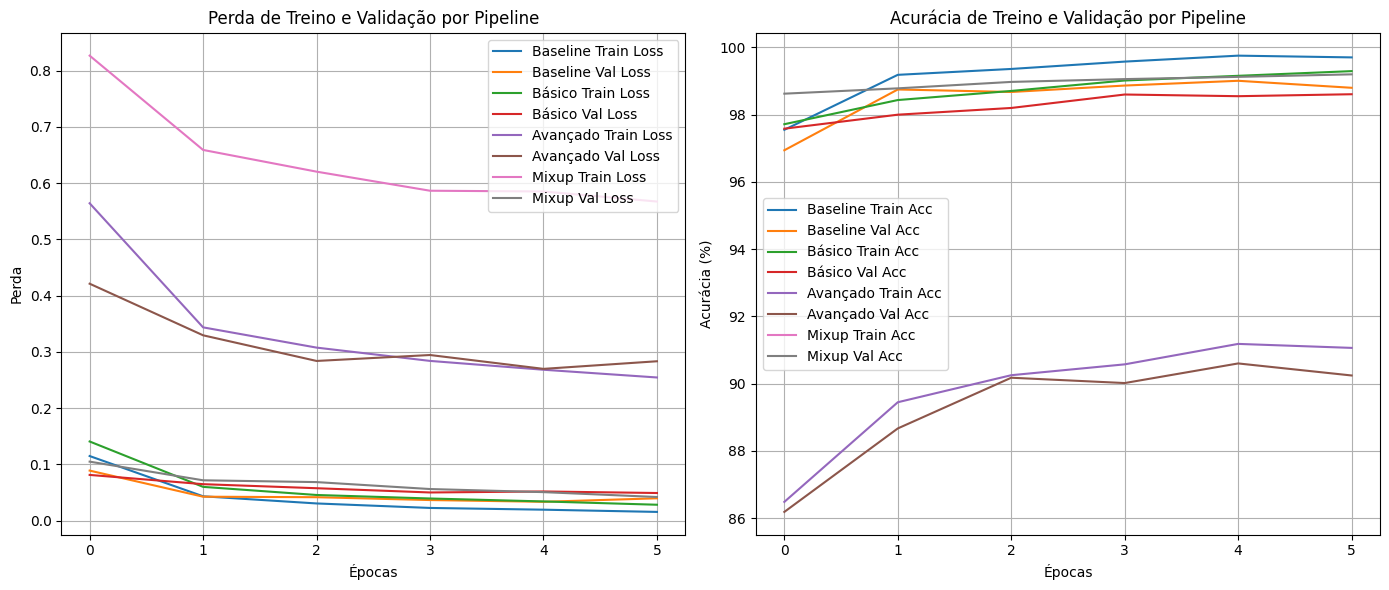

In [87]:
import matplotlib.pyplot as plt

# Ensure all metric lists are available from previous training steps
# Assuming the following lists are available:
# baseline_train_loss, baseline_train_acc, baseline_val_loss, baseline_val_acc
# basico_train_loss, basico_train_acc, basico_val_loss, basico_val_acc
# avancado_train_loss, avancado_train_acc, avancado_val_loss, avancado_val_acc
# mixup_train_loss, mixup_train_acc, mixup_val_loss, mixup_val_acc

plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(baseline_train_loss, label='Baseline Train Loss')
plt.plot(baseline_val_loss, label='Baseline Val Loss')
plt.plot(basico_train_loss, label='Básico Train Loss')
plt.plot(basico_val_loss, label='Básico Val Loss')
plt.plot(avancado_train_loss, label='Avançado Train Loss')
plt.plot(avancado_val_loss, label='Avançado Val Loss')
plt.plot(mixup_train_loss, label='Mixup Train Loss')
plt.plot(mixup_val_loss, label='Mixup Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda de Treino e Validação por Pipeline')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(baseline_train_acc, label='Baseline Train Acc')
plt.plot(baseline_val_acc, label='Baseline Val Acc')
plt.plot(basico_train_acc, label='Básico Train Acc')
plt.plot(basico_val_acc, label='Básico Val Acc')
plt.plot(avancado_train_acc, label='Avançado Train Acc')
plt.plot(avancado_val_acc, label='Avançado Val Acc')
plt.plot(mixup_train_acc, label='Mixup Train Acc') # Note: Mixup train acc might be NaN or less meaningful
plt.plot(mixup_val_acc, label='Mixup Val Acc')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia de Treino e Validação por Pipeline')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

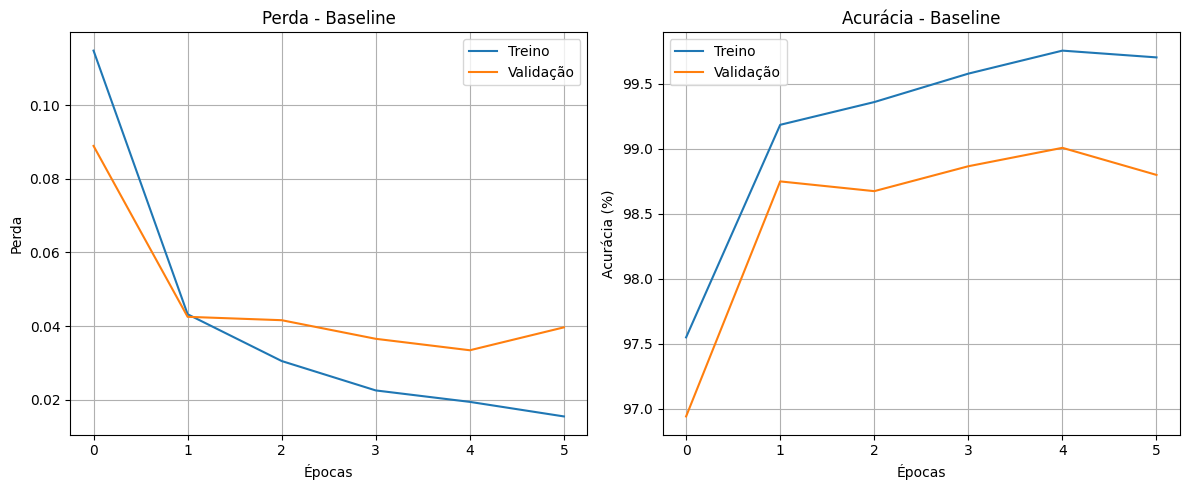

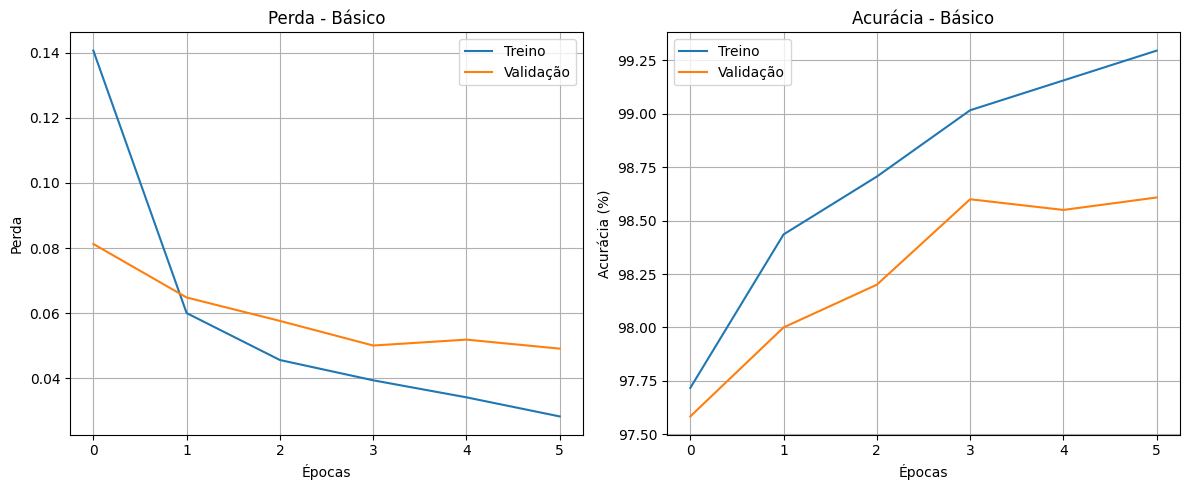

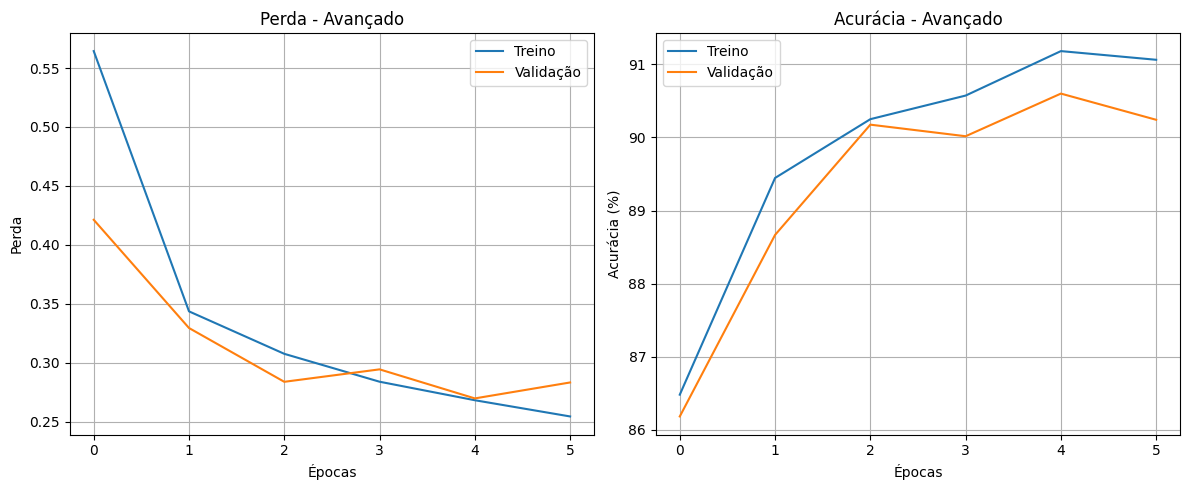

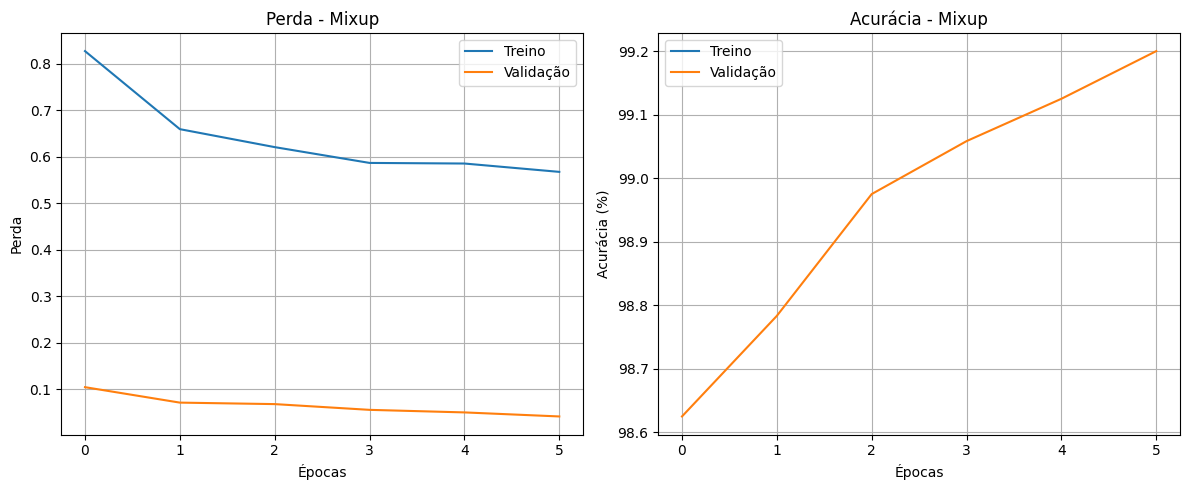

In [89]:
import matplotlib.pyplot as plt

# Dicionário com todas as métricas para facilitar
pipelines = {
    "Baseline": (baseline_train_loss, baseline_val_loss, baseline_train_acc, baseline_val_acc),
    "Básico": (basico_train_loss, basico_val_loss, basico_train_acc, basico_val_acc),
    "Avançado": (avancado_train_loss, avancado_val_loss, avancado_train_acc, avancado_val_acc),
    "Mixup": (mixup_train_loss, mixup_val_loss, mixup_train_acc, mixup_val_acc),
}

# Criar os gráficos
for name, (train_loss, val_loss, train_acc, val_acc) in pipelines.items():
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Treino')
    plt.plot(val_loss, label='Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title(f'Perda - {name}')
    plt.legend()
    plt.grid(True)

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Treino')
    plt.plot(val_acc, label='Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia (%)')
    plt.title(f'Acurácia - {name}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


## Testar o melhor modelo

### Subtask:
Avalie o modelo com o melhor desempenho no conjunto de teste final.


**Reasoning**:
Evaluate the best performing model on the test set. Based on the validation accuracy plots from the previous step, identify the pipeline with the highest validation accuracy, load its model weights, set the model to evaluation mode, iterate through the test loader, make predictions, and calculate the overall accuracy on the test set.



In [88]:
# Identify the best model based on validation accuracy
# Assuming the validation accuracy lists (baseline_val_acc, basico_val_acc, avancado_val_acc, mixup_val_acc)
# from the previous training steps are available.
# Find the max validation accuracy for each pipeline
max_baseline_val_acc = max(baseline_val_acc) if baseline_val_acc else -1
max_basico_val_acc = max(basico_val_acc) if basico_val_acc else -1
max_avancado_val_acc = max(avancado_val_acc) if avancado_val_acc else -1
max_mixup_val_acc = max(mixup_val_acc) if mixup_val_acc else -1

# Determine which pipeline had the highest validation accuracy
best_val_acc_value = max(max_baseline_val_acc, max_basico_val_acc, max_avancado_val_acc, max_mixup_val_acc)

best_pipeline = None
if best_val_acc_value == max_baseline_val_acc:
    best_pipeline = 'Baseline'
    best_model_state_dict = model_baseline.state_dict()
elif best_val_acc_value == max_basico_val_acc:
    best_pipeline = 'Básico'
    best_model_state_dict = model_basico.state_dict()
elif best_val_acc_value == max_avancado_val_acc:
    best_pipeline = 'Avançado'
    best_model_state_dict = model_avancado.state_dict()
elif best_val_acc_value == max_mixup_val_acc:
    best_pipeline = 'Mixup'
    best_model_state_dict = model_mixup.state_dict()

print(f"The best performing pipeline on validation set was: {best_pipeline} with accuracy {best_val_acc_value:.2f}%")

# Instantiate a new model and load the best weights
best_model = ConvNet()
best_model.load_state_dict(best_model_state_dict)
best_model.to(device) # Move the model to the appropriate device

# Evaluate the best model on the test set
best_model.eval() # Set the model to evaluation mode

correct = 0
total = 0
with torch.no_grad(): # Do not calculate gradients
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = best_model(images)

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Accumulate total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the final test accuracy
test_acc = (correct / total) * 100
print(f"Final Test Accuracy for the {best_pipeline} pipeline: {test_acc:.3f}%")

The best performing pipeline on validation set was: Mixup with accuracy 99.20%
Final Test Accuracy for the Mixup pipeline: 99.210%


## Summary:

### Data Analysis Key Findings

*   Transformations for Baseline, Basic, and Advanced pipelines were successfully created. The Advanced pipeline includes `TrivialAugmentWide` and `RandomErasing`, with the `RandomErasing` probability adjusted to 0.02.
*   Separate DataLoaders were created for the training sets of the Baseline, Basic, Advanced, and Mixup pipelines, and validation DataLoaders for each, along with a single test DataLoader. All training loaders have `shuffle=True`, while validation and test loaders have `shuffle=False`.
*   Functions (`mixup_data` and `mixup_criterion`) were defined to implement Mixup data augmentation during training.
*   A `train_model` function was implemented to train each pipeline, optionally applying Mixup, and track training and validation loss and accuracy per epoch.
*   Initial training of the Advanced pipeline failed due to the incorrect order of transformations (`ToTensor()` before `TrivialAugmentWide`). This was corrected by placing `TrivialAugmentWide` before `ToTensor()`.
*   The Mixup pipeline's training accuracy is reported as `nan` in the output because standard accuracy calculation is not directly applicable during training with mixed labels.
*   Visualizations of the loss and accuracy curves for all four pipelines were generated, allowing for a comparison of their performance over epochs.
*   Based on validation accuracy, the Mixup pipeline was identified as the best-performing model with a maximum validation accuracy of 99.20%.
*   The best model (from the Mixup pipeline) was evaluated on the test set, achieving a final test accuracy of 99.210%.

### Insights or Next Steps

*   The Mixup data augmentation strategy appears to yield the best performance on the validation and test sets for this image classification task, suggesting its effectiveness in regularization and generalization compared to the other methods tested.
*   Further analysis could involve comparing the robustness of the models trained with different augmentation strategies to noisy or out-of-distribution data.
